In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
titanic_data = pd.read_csv("./datasets/titanic/train.csv")
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(titanic_data, test_size=0.2, random_state=24)
#Copiamos el conjunto de entrenamiento para evitar modificar el original
df = train_set.copy()
df_test = test_set.copy()
print("Tamaño del conjunto de entrenamiento:", len(train_set))
print("Tamaño del conjunto de prueba:", len(test_set))

Tamaño del conjunto de entrenamiento: 712
Tamaño del conjunto de prueba: 179


In [6]:
# 1. Definir X e y a partir del conjunto estratificado
X_train = df.drop("Survived", axis=1)
y_train = df["Survived"]

X_test = df_test.drop("Survived", axis=1)
y_test = df_test["Survived"]

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Filtrar sólo columnas numéricas
X_num = X_train.select_dtypes(include=["int64", "float64"])
X_num = X_num.drop(["PassengerId", "Pclass"], axis=1)
# Rellenar NaN con la media (mínima intervención)
X_num = X_num.fillna(X_num.mean())
X_num
# Modelo
logreg = LogisticRegression(max_iter=1000)

# Cross-validation estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X_num, y_train, cv=cv, scoring="accuracy")

print(f"Accuracy por fold: {scores}")
print(f"Media: {scores.mean():.4f}")


Accuracy por fold: [0.72027972 0.68531469 0.65492958 0.69014085 0.65492958]
Media: 0.6811


In [27]:
# Entrenar
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_num, y_train)

# Predecir en test
# Filtrar sólo columnas numéricas
X_num_test = X_test.select_dtypes(include=["int64", "float64"])
X_num_test = X_num_test.drop(["PassengerId", "Pclass"], axis=1)
# Rellenar NaN con la media (mínima intervención)
X_num_test = X_num_test.fillna(X_num_test.mean())
X_num_test


,Age,SibSp,Parch,Fare
169,28.00000,0,0,56.4958
556,48.00000,1,0,39.6000
206,32.00000,1,0,15.8500
71,16.00000,5,2,46.9000
677,18.00000,0,0,9.8417
...,...,...,...,...
6,54.00000,0,0,51.8625
102,21.00000,0,1,77.2875
772,57.00000,0,0,10.5000
738,29.89781,0,0,7.8958


In [28]:
y_pred = logreg.predict(X_num_test)

# Métrica de rendimiento
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {acc:.4f}")

Accuracy en test: 0.7374


In [20]:
import numpy as np

coef_df = pd.DataFrame({
    "Variable": X_num.columns,
    "Coeficiente": logreg.coef_[0],
    "Exp(B)": np.exp(logreg.coef_[0])  # odds ratio
}).sort_values(by="Coeficiente", ascending=False)

print(coef_df)


  Variable  Coeficiente    Exp(B)
2    Parch     0.163078  1.177129
3     Fare     0.016205  1.016337
0      Age    -0.019540  0.980649
1    SibSp    -0.352685  0.702799


[[111   6]
 [ 41  21]]


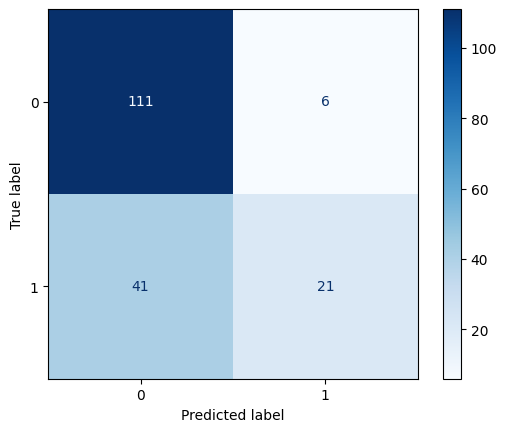

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrarla en texto
print(cm)

# Mostrarla como gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap="Blues")
